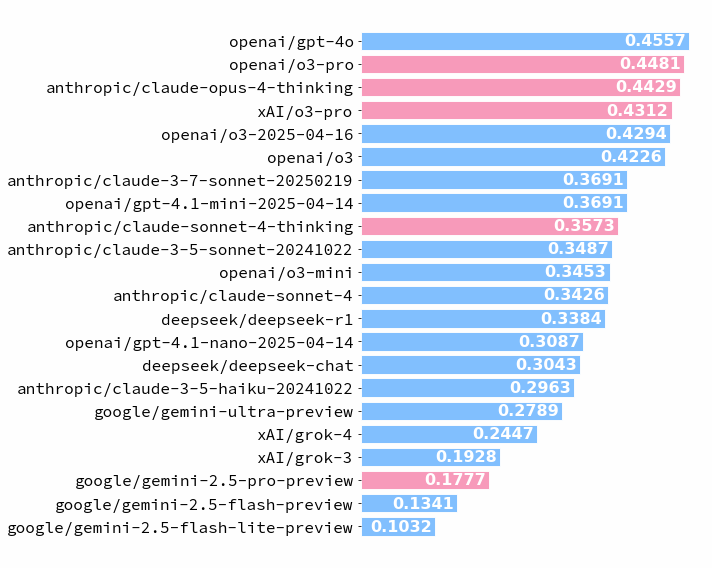

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

models = [
    "openai/gpt-4o",
    "openai/o3-pro",
    "anthropic/claude-opus-4-thinking",
    "xAI/o3-pro",
    "openai/o3-2025-04-16",
    "openai/o3",
    "anthropic/claude-3-7-sonnet-20250219",
    "openai/gpt-4.1-mini-2025-04-14",
    "anthropic/claude-sonnet-4-thinking",
    "openai/o3-mini",
    "anthropic/claude-3-5-sonnet-20241022",
    "anthropic/claude-sonnet-4",
    "deepseek/deepseek-r1",
    "openai/gpt-4.1-nano-2025-04-14",
    "deepseek/deepseek-chat",
    "anthropic/claude-3-5-haiku-20241022",
    "google/gemini-ultra-preview",
    "xAI/grok-4",
    "xAI/grok-3",
    "google/gemini-2.5-pro-preview",
    "google/gemini-2.5-flash-preview",
    "google/gemini-2.5-flash-lite-preview"
]

accuracies = [
    0.4557, 0.4481, 0.4429, 0.4312, 0.4294, 0.4226,
    0.3691, 0.3691, 0.3573, 0.3453, 0.3487, 0.3426,
    0.3384, 0.3087, 0.3043, 0.2963, 0.2789, 0.2447,
    0.1928, 0.1777, 0.1341, 0.1032
]

paired = list(zip(models, accuracies))
paired.sort(key=lambda x: x[1], reverse=True)
models, accuracies = zip(*paired)

reasoning_keywords = ['thinking', 'opus', 'pro']
colors = [
    '#f78fb3' if any(k in m.lower() for k in reasoning_keywords) else '#74b9ff'
    for m in models
]

preferred_fonts = ["Source Code Pro", "Fira Code", "JetBrains Mono", "Consolas", "Menlo", "Courier New"]
for name in preferred_fonts:
    try:
        font_mono = fm.FontProperties(fname=fm.findfont(name))
        break
    except:
        continue
else:
    font_mono = fm.FontProperties(family="monospace")

font_sans = fm.FontProperties(family="DejaVu Sans", size=16)

plt.figure(figsize=(10, 8), facecolor='#fefefe')
ax = plt.gca()
ax.set_facecolor('#fefefe')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

bars = ax.barh(
    range(len(models)),
    accuracies,
    color=colors,
    height=0.8,
    edgecolor='white',
    linewidth=1,
    alpha=0.9
)

for bar in bars:
    bar.set_capstyle('round')

for i, bar in enumerate(bars):
    w = bar.get_width()
    ax.text(w - 0.09, i, f"{w:.4f}", va='center', ha='left', fontsize=16, color="#ffffff", fontweight='bold')

ax.set_yticks(range(len(models)))
ax.set_yticklabels(models, fontproperties=font_mono, fontsize=16)
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.3)
ax.set_xticks([])

plt.tight_layout()
plt.savefig('model_accuracy_pass2.pdf', dpi=300)
plt.show()

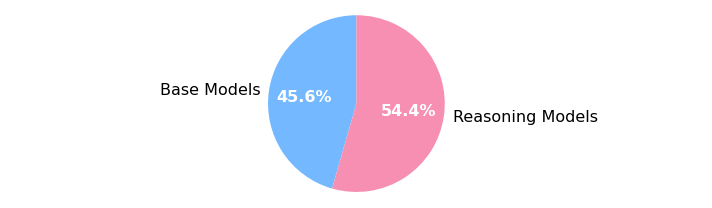

In [2]:
import matplotlib.pyplot as plt

labels = ["Base Models", "Reasoning Models"]

sizes = [0.3108, 0.3714]

colors = ["#74b9ff", "#f78fb3"]

fig, ax = plt.subplots(figsize=(10, 3))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct=lambda pct: f"{pct:.1f}%",
    startangle=90,
    textprops={"fontsize": 16}
)

for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontweight("bold")

# ax.legend(loc='upper right', fontsize=16)

ax.axis('equal')

plt.tight_layout()
plt.savefig('pass2_comparison_pie.pdf', dpi=300)
plt.show()
